In [1]:
# Install required libraries. This takes about **4-5 mins**.
%%time
!pip install torch==1.11.0 torchvision==0.12.0
!pip uninstall tensorflow -y
!pip install tensorflow-gpu==2.8.0
!pip install blend_modes
!pip install segmentation-models-pytorch==0.1.3
!pip install --upgrade tf_slim
!pip install timm==0.4.12

  Using cached timm-0.3.2-py3-none-any.whl.metadata (19 kB)
Using cached timm-0.3.2-py3-none-any.whl (244 kB)
  Attempting uninstall: timm
    Found existing installation: timm 0.4.12
    Uninstalling timm-0.4.12:
      Successfully uninstalled timm-0.4.12
  Using cached timm-0.4.12-py3-none-any.whl.metadata (30 kB)
Using cached timm-0.4.12-py3-none-any.whl (376 kB)
  Attempting uninstall: timm
    Found existing installation: timm 0.3.2
    Uninstalling timm-0.3.2:
      Successfully uninstalled timm-0.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segmentation-models-pytorch 0.1.3 requires timm==0.3.2, but you have timm 0.4.12 which is incompatible.
CPU times: user 282 ms, sys: 41.2 ms, total: 323 ms
Wall time: 33.3 s


In [11]:
# This chunk works.
!pip uninstall --yes gdown # After running this line, restart Colab runtime.

!pip install gdown -U --no-cache-dir

import gdown

!gdown --id 18UlvYDL6UGZ2rs0yaDsSzoUlw8KI5ABY

!apt-get install unrar

!mkdir /content/makeup_dataset
!unrar x /content/makeup_dataset.rar /content/makeup_dataset -Y

Streaming output truncated to the last 5000 lines.
Extracting  /content/makeup_dataset/all/images/makeup/XYH-176.png         68%  OK 
Extracting  /content/makeup_dataset/all/images/makeup/XYH-178.png         68%  OK 
Extracting  /content/makeup_dataset/all/images/makeup/XYUH-005.png        68%  OK 
Extracting  /content/makeup_dataset/all/images/makeup/XYUH-016.png        68%  OK 
Extracting  /content/makeup_dataset/all/images/makeup/XYUH-017.png        68%  OK 
Extracting  /content/makeup_dataset/all/images/makeup/XYUH-019.png        68%  OK 
Extracting  /content/makeup_dataset/all/images/makeup/XYUH-022.png        68%  OK 
Extracting  /content/makeup_dataset/all/images/makeup/XYUH-024.png        68%  OK 
Extracting  /content/makeup_dataset/all/images/makeup/XYUH-025.png        68%  OK 
Extracting  /content/makeup_dataset/all/images/makeup/XYUH-039.png        68%  OK 
Extracting  /content/makeup_d

In [3]:
from google.colab import drive
import os

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
os.chdir('/content/gdrive/MyDrive/CPM_v2')

In [5]:
import argparse

args_dict = {
    "checkpoint_pattern": "./checkpoints/pattern.pth",
    "checkpoint_color": "./checkpoints/color.pth",
    "device": "cuda",
    "prn": True,
    "color_only": True,  # Since store_true, default is False
    "pattern_only": False,  # Since store_true, default is False
    "input": "./imgs/non-makeup.png",
    "style": "./imgs/style-2.png",
    "alpha": 0.5,
    "savedir": ".",
    "lr": 5e-4,  # learning rate
    "max_iter": 5000,  # maximum iterations
    "src_dir": "makeup_dataset/all/images/non-makeup",  # source image directory
    "ref_dir": "makeup_dataset/all/images/makeup",  # reference image directory
}

args = argparse.Namespace(**args_dict)

In [6]:
from SemCorr import CPMPlus
import torch

# del model
model = CPMPlus(args)
model.load_state_dict(torch.load('/content/gdrive/MyDrive/CPM_v2/cpmodel.pth'))

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'segmentation_models_pytorch.unet.model.Unet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'segmentation_models_pytorch.encoders.resnet.ResNetEncoder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.d

<All keys matched successfully>

In [7]:
print(model)

CPMPlus(
  (scm): Semantic_Correspodance_Module(
    (enc): Encoder_Semantic(
      (conv1): LeakyReLUConv2d(
        (model): Sequential(
          (0): ReflectionPad2d((3, 3, 3, 3))
          (1): Conv2d(5, 32, kernel_size=(7, 7), stride=(1, 1))
          (2): LeakyReLU(negative_slope=0.2)
        )
      )
      (conv2): LeakyReLUConv2d(
        (model): Sequential(
          (0): ReflectionPad2d((1, 1, 1, 1))
          (1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
          (2): LeakyReLU(negative_slope=0.2)
        )
      )
      (conv3): LeakyReLUConv2d(
        (model): Sequential(
          (0): ReflectionPad2d((1, 1, 1, 1))
          (1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
          (2): LeakyReLU(negative_slope=0.2)
        )
      )
      (conv4): LeakyReLUConv2d(
        (model): Sequential(
          (0): ReflectionPad2d((1, 1, 1, 1))
          (1): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
          (2): LeakyReLU(negative_slope=0.2)
  

/usr/local/lib/python3.10/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


array([[[170, 124,  89],
        [176, 131,  92],
        [181, 136,  95],
        ...,
        [ 40,  39,  45],
        [ 47,  46,  52],
        [ 43,  43,  49]],

       [[172, 126,  92],
        [177, 131,  94],
        [185, 140,  99],
        ...,
        [ 46,  47,  52],
        [ 46,  47,  52],
        [ 48,  49,  54]],

       [[170, 124,  91],
        [181, 135,  98],
        [183, 137,  98],
        ...,
        [ 46,  44,  51],
        [ 44,  43,  49],
        [ 52,  51,  57]],

       ...,

       [[228, 223, 212],
        [226, 220, 208],
        [224, 218, 206],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  27],
        [ 30,  29,  27]],

       [[229, 224, 212],
        [230, 224, 212],
        [226, 220, 208],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  28],
        [ 31,  31,  29]],

       [[228, 224, 212],
        [229, 224, 212],
        [229, 223, 211],
        ...,
        [ 31,  31,  31],
        [ 35,  35,  33],
        [ 33,  33,  31]]], dtype=uint8)
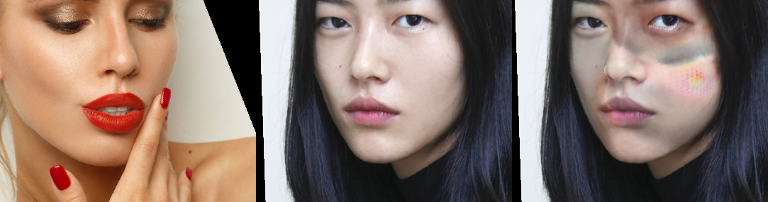

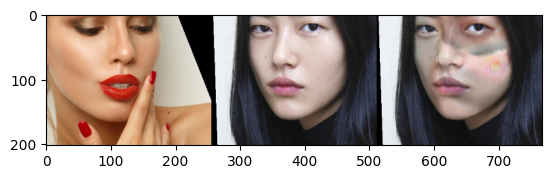

In [8]:
import torch
import copy

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

ref = 'makeup_dataset/all/images/makeup/7a6efe107c6d7cdc5dd77d2af63b5bcb.png'
src = 'makeup_dataset/all/images/non-makeup/vSYYZ382.png'
device = torch.device('cuda:0')

model.to(device)
model.args.color_only = True

def INFER(src, ref, show= False):
  imgA = np.array(Image.open(src))
  imgB = np.array(Image.open(ref))

  imgB = cv2.resize(imgB, (256, 256))

  _, _, output = model(imgA, imgB)

  # Image.fromarray((output).astype("uint8")).save(save_path)
  # print("Completed 👍 Please check result in: {}".format(save_path))

  if show:
    plt.imshow(Image.fromarray((output).astype("uint8")))
  return output

INFER(src, ref, show= True)

In [18]:
input_images = sorted(os.listdir('makeup_dataset/all/images/non-makeup'))
style_images = sorted(os.listdir('makeup_dataset/all/images/makeup'))

In [ ]:
root_dir = '/content/makeup_dataset/all'
dataset_dir = 'makeup_dataset/all'
output_dir = os.path.join('makeup_dataset/results')

if not os.path.exists(output_dir):
  os.makedirs(output_dir)

if not os.path.exists(os.path.join(output_dir, 'images')):
  os.makedirs(os.path.join(output_dir, 'images'))
  os.makedirs(os.path.join(output_dir, 'images', 'makeup'))
  os.makedirs(os.path.join(output_dir, 'images', 'non-makeup'))
  os.makedirs(os.path.join(output_dir, 'images', 'infer'))

if not os.path.exists(os.path.join(output_dir, 'segs')):
  os.makedirs(os.path.join(output_dir, 'segs'))
  os.makedirs(os.path.join(output_dir, 'segs', 'makeup'))
  os.makedirs(os.path.join(output_dir, 'segs', 'non-makeup'))

seg_input_images = [os.path.join(root_dir, 'segs', 'non-makeup', x) for x in input_images]
seg_style_images = [os.path.join(root_dir, 'segs', 'makeup', x) for x in style_images]

for idx, (input_image, style_image) in enumerate(zip(input_images, style_images), start=1):
    imgA = np.array(Image.open(os.path.join(dataset_dir, "images", "non-makeup", input_image)))
    imgB = np.array(Image.open(os.path.join(dataset_dir, "images", "makeup", style_image)))

    seg_imgA = np.array(Image.open(os.path.join(root_dir, "segs", "non-makup", input_image)))
    seg_imgB = np.array(Image.open(os.path.join(root_dir, "segs", "makeup", style_image)))

    imgA = cv2.resize(imgA, (256, 256))
    imgB = cv2.resize(imgB, (256, 256))

    output = INFER(src = os.path.join(dataset_dir, "images", "non-makeup", input_image),
                   ref = os.path.join(dataset_dir, "images", "makeup", style_image))

    infer_img_save_path = os.path.join(output_dir, "images", "infer", f"{idx}.png")
    input_img_save_path = os.path.join(output_dir, "images", "non-makeup", f"{idx}.png")
    style_img_save_path = os.path.join(output_dir, "images", "makeup", f"{idx}.png")
    seg_input_img_save_path = os.path.join(output_dir, "segs", "non-makeup", f"{idx}.png")
    seg_style_img_save_path = os.path.join(output_dir, "segs", "makeup", f"{idx}.png")

    Image.fromarray((output).astype("uint8")).save(infer_img_save_path)
    Image.fromarray(imgA).save(input_img_save_path)
    Image.fromarray(imgB).save(style_img_save_path)
    Image.fromarray(seg_imgA).save(seg_input_img_save_path)
    Image.fromarray(seg_imgB).save(seg_style_img_save_path)

    print(f"Completed 👍 Please check result in: {infer_img_save_path}")

Completed 👍 Please check result in: makeup_dataset/results/images/infer/1.png
Completed 👍 Please check result in: makeup_dataset/results/images/infer/2.png
Completed 👍 Please check result in: makeup_dataset/results/images/infer/3.png
Completed 👍 Please check result in: makeup_dataset/results/images/infer/4.png
Completed 👍 Please check result in: makeup_dataset/results/images/infer/5.png
Completed 👍 Please check result in: makeup_dataset/results/images/infer/6.png
Completed 👍 Please check result in: makeup_dataset/results/images/infer/7.png
Completed 👍 Please check result in: makeup_dataset/results/images/infer/8.png
Completed 👍 Please check result in: makeup_dataset/results/images/infer/9.png
Completed 👍 Please check result in: makeup_dataset/results/images/infer/10.png
Completed 👍 Please check result in: makeup_dataset/results/images/infer/11.png
Completed 👍 Please check result in: makeup_dataset/results/images/infer/12.png
Completed 👍 Please check result in: makeup_dataset/results/im